In this notebook, we will be reducing the original dataset. On one hand, this is to select the conditions and donors that we interested in for the consequent analysis. On the other hand, it was essential for us to reduce the size of the dataset to be able to construct the pipeline and conduct the analysis without crashing the kernel.

# **Import Packages**

Make sure to install the packages prior to importing them if they are not already installed to your environment.

In [47]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

Original dataset; Size: 6,28 GB - 26 disease types. 

You can download the full dataset at the following link: https://datasets.cellxgene.cziscience.com/e1fd8b32-0855-4ab2-b1c4-3e9dae6fd3b2.h5ad.

In [ ]:
# Open the file without RAM involved to later load the whole thing ('backed' mode)

# Make sure to change the path to the path of the file on your computer
adata = sc.read_h5ad("*/adata.h5ad", backed = 'r') 

#Elodie's path
# adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/adata.h5ad", backed = 'r')

#Yara's path
# adata = sc.read_h5ad("/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/original_dataset_prefrontal_cortex.h5ad", backed  = 'r')

To see the number of cells for each disease type:

In [11]:
disease_list = list(adata.obs["disease"].cat.categories)

for disease_type in disease_list : 
    print(disease_type, ":", len(adata.obs[adata.obs["disease"] == disease_type]), "cells.")

dementia : 9681 cells.
dementia || vascular dementia : 13304 cells.
dementia || vascular dementia || Alzheimer disease : 31871 cells.
dementia || vascular dementia || Alzheimer disease || diabetes mellitus : 6946 cells.
dementia || vascular dementia || Alzheimer disease || Parkinson disease : 4845 cells.
dementia || vascular dementia || diabetes mellitus : 4960 cells.
dementia || Alzheimer disease : 175691 cells.
dementia || Alzheimer disease || diabetes mellitus : 50874 cells.
dementia || Alzheimer disease || diabetes mellitus || Parkinson disease || head injury : 1406 cells.
dementia || Alzheimer disease || Parkinson disease : 28175 cells.
dementia || Alzheimer disease || Parkinson disease || Lewy body dementia : 7538 cells.
dementia || Alzheimer disease || Lewy body dementia : 11308 cells.
dementia || diabetes mellitus || Parkinson disease : 3990 cells.
dementia || Parkinson disease : 7772 cells.
dementia || Parkinson disease || Lewy body dementia || head injury : 2533 cells.
dement

# **Dataset's Metadata**

scanpy shows a summary of the dataset's metadata:

In [12]:
print(adata)

print("The dimensions of the adata variable are:", adata.shape)

AnnData object with n_obs × n_vars = 693682 × 34176 backed at '\\Users\\yarad\\Desktop\\x\\Masters\\Master BMC - Sorbonne\\M2\\Single Cell\\Project\\Coding Project\\original_dataset_prefrontal_cortex.h5ad'
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_l

## *adata.obs*
adata.obs stores the information for each sample.

In [13]:
adata.obs.head()

,Source,n_genes,n_counts,class,subclass,subtype,tissue_ontology_term_id,tissue_type,assay_ontology_term_id,cell_type_ontology_term_id,...,genetic_ancestry,disease_ontology_term_id,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
barcodekey,,,,,,,,,,,,,,,,,,,,,
Donor_45-2-AAGTACCGTAGTCGTT-0,R,1611,2701.0,Astro,Astro,Astro_ADAMTSL3,UBERON:0009834,tissue,EFO:0009922,CL:0000127,...,African,MONDO:0001627 || MONDO:0004975,astrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,Z80OyND&?m
Donor_45-2-ACGGTCGTCGAATGCT-0,R,2452,4502.0,Oligo,Oligo,Oligo_RBFOX1,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,African,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,E&Xu<>WI4I
Donor_45-2-ACTACGAGTCCTATAG-0,R,3375,8037.0,EN,EN_L2_3_IT,EN_L2_3_IT_PDGFD,UBERON:0009834,tissue,EFO:0009922,CL:4030059,...,African,MONDO:0001627 || MONDO:0004975,L2/3 intratelencephalic projecting glutamaterg...,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,^@$VCvP!FS
Donor_45-2-ACTACGATCATTGCCC-0,R,3507,7505.0,EN,EN_L2_3_IT,EN_L2_3_IT_PDGFD,UBERON:0009834,tissue,EFO:0009922,CL:4030059,...,African,MONDO:0001627 || MONDO:0004975,L2/3 intratelencephalic projecting glutamaterg...,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,#E<kEA<k+*
Donor_45-2-ACTATGGCATGTTACG-0,R,1944,3141.0,Mural,VLMC,VLMC_DCDC2,UBERON:0009834,tissue,EFO:0009922,CL:4023051,...,African,MONDO:0001627 || MONDO:0004975,vascular leptomeningeal cell,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,+LQLH5?Y5W


The keys of adata.obs are:

In [14]:
print("The keys of adata.obs:", adata.obs.keys())

The keys of adata.obs: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


More information about adata.obs, prior to dataset reduction:

#### **How many donors are there?**

In [15]:
adata.obs["donor_id"].value_counts()

n_donors = len(adata.obs["donor_id"].unique())
n_sex = len(adata.obs["sex"].unique())
n_ethnicity = len(adata.obs["genetic_ancestry"].unique())
n_age = len(adata.obs["development_stage"].unique())
n_disease = len(adata.obs["disease"].unique())

print("In the dataset, there are", n_donors, "donors. They are characterized by:", n_sex, "sexes,", n_age, "age ranges,", n_ethnicity, "ethnicities, and", n_disease, "diseases." )

In the dataset, there are 152 donors. They are characterized by: 2 sexes, 28 age ranges, 5 ethnicities, and 26 diseases.


#### **How many donors were male and how many were female?**

In [60]:
count_sex = adata.obs.groupby(["sex"], observed = True)["donor_id"].nunique()

print(f"Among the {n_donors} donors, there are :")
print(count_sex)

Among the 152 donors, there are :
sex
female    101
male       51
Name: donor_id, dtype: int64


#### **What were their ages ("development_stage")?**

In [63]:
count_age = adata.obs.groupby(["development_stage"], observed = True)["donor_id"].nunique()

print(f"Among the {n_donors} donors, there are :")
print(count_age)

Among the 152 donors, there are :
development_stage
54-year-old stage              1
64-year-old stage              1
65-year-old stage              4
66-year-old stage              3
67-year-old stage              2
68-year-old stage              1
69-year-old stage              2
70-year-old stage              1
71-year-old stage              1
72-year-old stage              2
73-year-old stage              3
74-year-old stage              1
75-year-old stage              3
76-year-old stage              3
77-year-old stage              2
78-year-old stage              4
79-year-old stage              7
80 year-old and over stage    52
80-year-old stage              3
81-year-old stage              3
82-year-old stage              7
83-year-old stage              7
84-year-old stage              8
85-year-old stage              8
86-year-old stage              7
87-year-old stage              3
88-year-old stage              7
89-year-old stage              6
Name: donor_id, dtype: i

#### **What were their ethnicities?**

In [65]:
count_ancestry = adata.obs.groupby(["genetic_ancestry"], observed = True)["donor_id"].nunique()

print(f"Among the {n_donors} donors, there are :")
print(count_ancestry)

Among the 152 donors, there are :
genetic_ancestry
European      26
Asian          1
East Asian     7
African       89
unknown       29
Name: donor_id, dtype: int64


Barplot representations of the metadata:

In [59]:
# Defining the function needed to generate barplots for each variable:
def plot_single_bar(count_series, title, xlabel):
    df = count_series.reset_index()
    df.columns = [xlabel, "num_donors"]

    plt.figure(figsize = (8,5))
    sns.barplot(data = df, x = xlabel, y = "num_donors", palette = "Blues")
    plt.title(title)
    plt.ylabel("Number of Donors")
    plt.xticks(rotation = 45)
    
    plt.tight_layout()
    plt.show()

C:\Users\yarad\AppData\Local\Temp\ipykernel_23468\3772978764.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = xlabel, y = "num_donors", palette = "Blues")


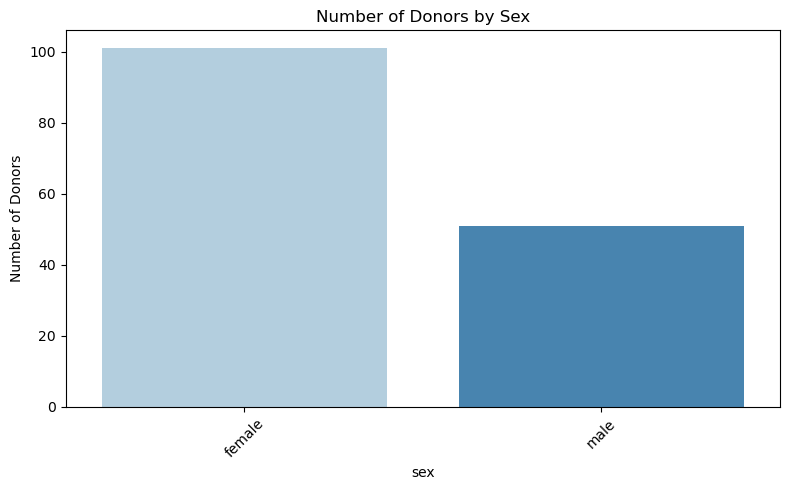

In [62]:
# Sex
plot_single_bar(count_sex, "Number of Donors by Sex", "sex")

C:\Users\yarad\AppData\Local\Temp\ipykernel_23468\3772978764.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = xlabel, y = "num_donors", palette = "Blues")


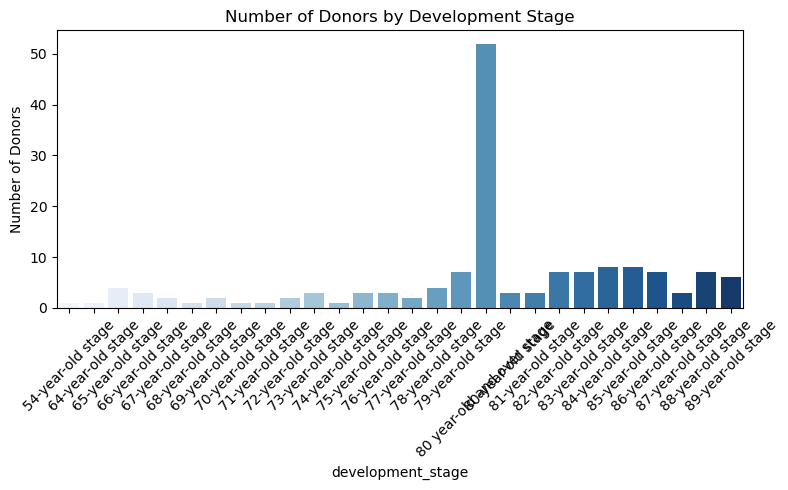

In [64]:
# Age / Development Stage
plot_single_bar(count_age, "Number of Donors by Development Stage", "development_stage")

C:\Users\yarad\AppData\Local\Temp\ipykernel_23468\3772978764.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = xlabel, y = "num_donors", palette = "Blues")


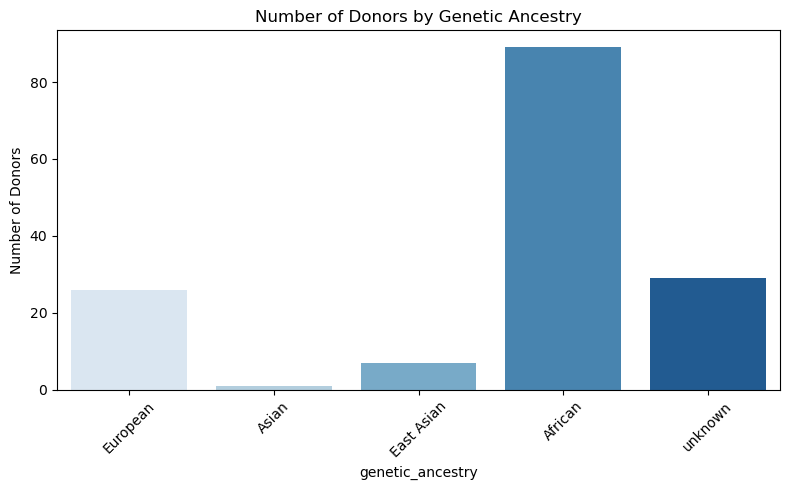

In [66]:
# Ethnicity / Genetic Ancestry
plot_single_bar(count_ancestry, "Number of Donors by Genetic Ancestry", "genetic_ancestry")

## *adata.var*
adata.var includes the genes' information.

In [19]:
adata.var.head(5)

,gene_name,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000000003,TSPAN6,256237,False,TSPAN6,NCBITaxon:9606,gene,2396,protein_coding
ENSG00000000005,TNMD,21369,False,TNMD,NCBITaxon:9606,gene,873,protein_coding
ENSG00000000419,DPM1,3001206,False,DPM1,NCBITaxon:9606,gene,1262,protein_coding
ENSG00000000457,SCYL3,1941205,False,SCYL3,NCBITaxon:9606,gene,2916,protein_coding
ENSG00000000460,C1orf112,1798664,False,FIRRM,NCBITaxon:9606,gene,2661,protein_coding


To see the genes' metadata:

In [20]:
print("adata.var.keys :", adata.var.keys())

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')


## *data.obsm*
To see the keys for the embeddings (UMAP, PCA, ...):

In [22]:
print("adata.obsm.keys :", adata.obsm.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)


To visualize the corresponding UMAP, remove the #:

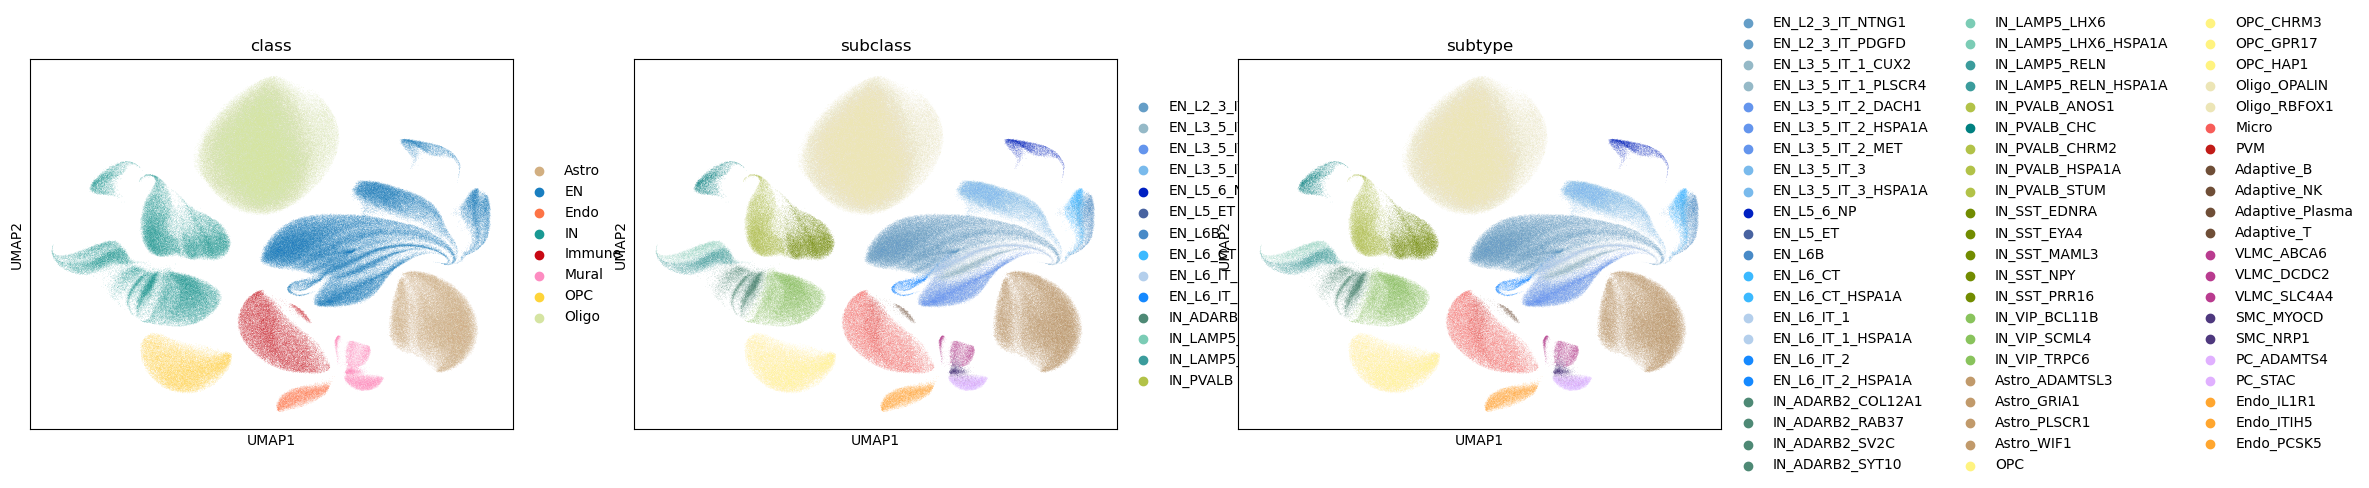

In [24]:
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

#sc.pl.umap(adata, color ='cell_type')

#sc.pl.umap(adata, color = 'disease')

#sc.pl.umap(adata, color = 'AD_status')

#sc.pl.umap(adata, color = 'sex')

## *adata.uns*
Other diverse information:

In [23]:
print("adata.uns.keys :", adata.uns.keys())

adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid', 'cell_type_colors', 'disease_colors', 'AD_status_colors', 'sex_colors'])


## **Data selection: AD + PD + normal**

We're only selecting cells from the following donors:
- AD: Alzheimer's Disease
- PD: Parkinson's Disease
- Normal: Control (healthy)

To reduced the dataset, we removed all cells taken from African donors and donors from unknown ethnicities for all 3 conditions, as they make up most of the donors. This is important to note and should be kept in mind while interpreting our analysis' results.


In [ ]:
# Selecting the conditions and donors of interest
is_AD = (adata.obs['disease'] == "dementia || Alzheimer disease") & (adata.obs['genetic_ancestry'] != "African") & (adata.obs['genetic_ancestry'] != "unknown")
is_PD = (adata.obs['disease'] == "dementia || Parkinson disease") & (adata.obs['genetic_ancestry'] != "African")
is_CTRL = (adata.obs['disease'] == "normal") & (adata.obs['genetic_ancestry'] != "African") & (adata.obs['genetic_ancestry'] != "unknown")

In [29]:
# Getting the index of each mask (i.e. the positions in the AnnData object)
AD_idx = np.flatnonzero(is_AD)
PD_idx = np.flatnonzero(is_PD)
CTRL_idx = np.flatnonzero(is_CTRL)

In [28]:
# Randomly mixing indices
np.random.shuffle(AD_idx)
np.random.shuffle(PD_idx)
np.random.shuffle(CTRL_idx)

In [30]:
# Choosing the final indices of samples to keep in the reduced dataset
final_idx = np.concatenate([AD_idx, PD_idx, CTRL_idx])

adata_sub = adata[final_idx, :]
adata_sub.obs

,Source,n_genes,n_counts,class,subclass,subtype,tissue_ontology_term_id,tissue_type,assay_ontology_term_id,cell_type_ontology_term_id,...,genetic_ancestry,disease_ontology_term_id,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
barcodekey,,,,,,,,,,,,,,,,,,,,,
Donor_865-1-AAACCCACAAGACTGG-0,R,3397,8087.0,Immune,Micro,Micro,UBERON:0009834,tissue,EFO:0009922,CL:0000129,...,East Asian,MONDO:0001627 || MONDO:0004975,microglial cell,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,69-year-old stage,Yx(*{1M3hR
Donor_865-1-AAACCCAGTGAATATG-0,R,6829,28101.0,EN,EN_L3_5_IT_2,EN_L3_5_IT_2_MET,UBERON:0009834,tissue,EFO:0009922,CL:4023040,...,East Asian,MONDO:0001627 || MONDO:0004975,L2/3-6 intratelencephalic projecting glutamate...,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,69-year-old stage,^fD_6s;t1{
Donor_865-1-AAACCCATCTTTCCGG-0,R,2628,5522.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,East Asian,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,69-year-old stage,!Y$498;O^P
Donor_865-1-AAACGAATCAATCGGT-0,R,5998,24035.0,IN,IN_SST,IN_SST_EDNRA,UBERON:0009834,tissue,EFO:0009922,CL:4023017,...,East Asian,MONDO:0001627 || MONDO:0004975,sst GABAergic cortical interneuron,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,69-year-old stage,&?|*A9Xyh!
Donor_865-1-AAACGAATCGTTCTAT-0,R,2425,5217.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,East Asian,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,69-year-old stage,DM|zX*{ZXH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Donor_1146-2-TTTGGTTGTATCGTTG-1,R,2452,4766.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,European,PATO:0000461,oligodendrocyte,10x 3' v3,normal,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,2~N_o$Q+&*
Donor_1146-2-TTTGGTTTCGAGATGG-1,R,3473,7389.0,Astro,Astro,Astro_WIF1,UBERON:0009834,tissue,EFO:0009922,CL:0000127,...,European,PATO:0000461,astrocyte,10x 3' v3,normal,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,7%1*nG$tRF
Donor_1146-2-TTTGTTGAGTATTGCC-1,R,1906,3107.0,Mural,VLMC,VLMC_ABCA6,UBERON:0009834,tissue,EFO:0009922,CL:4023051,...,European,PATO:0000461,vascular leptomeningeal cell,10x 3' v3,normal,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,`g6|F;5}sk


To confirm that we only kept the conditions of interest:

In [36]:
print(adata_sub.obs["disease"].unique())
print(adata_sub.obs["genetic_ancestry"].unique())

['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']
Categories (3, object): ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']
['East Asian', 'European', 'Asian']
Categories (3, object): ['European', 'Asian', 'East Asian']


## **Reduced Dataset's Metadata**
#### **How many donors are there?**

In [37]:
n_donors_sub = len(adata_sub.obs["donor_id"].unique())
n_cells_sub = adata_sub.shape[0]

print("There are", n_donors_sub, "donors and", n_cells_sub, "cells in the reduced dataset.")

There are 17 donors and 77052 cells in the reduced dataset.


#### **How many donors per disease? What were their gender, ethnicity, and age?**

In [38]:
# Gender distribution by disease in the reduced dataset
donors_by_disease_and_sex = (adata_sub.obs.groupby(["disease", "sex"], observed=True)["donor_id"].nunique())

donors_by_disease_and_sex

disease                        sex   
dementia || Alzheimer disease  female    4
                               male      4
dementia || Parkinson disease  female    1
                               male      2
normal                         female    3
                               male      3
Name: donor_id, dtype: int64

In [48]:
# Define the needed function to generate a barpot from a dataframe
def plot_bar(df, hue, title):
    plt.figure(figsize = (10,6))
    sns.barplot(
        data = df,
        x = "disease",
        y = "n_donors",
        hue = hue,
        palette = "Set2"
    )
    
    plt.title(title, fontsize = 14)
    plt.ylabel("Number of Donors")
    plt.xlabel("Disease")
    plt.xticks(rotation = 45, ha = "right")
    plt.tight_layout()

    plt.show()

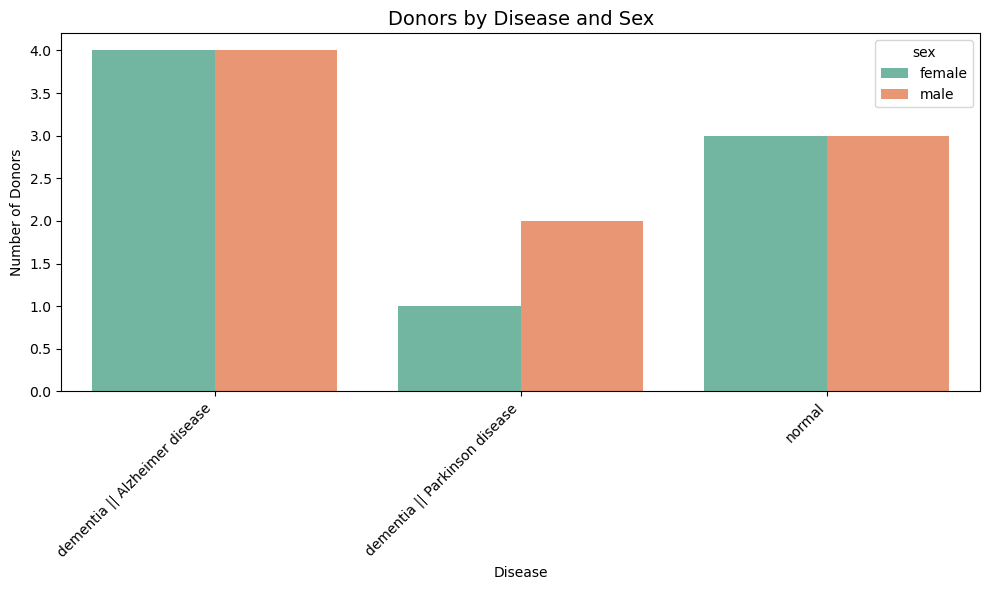

In [58]:
# Convert the series into a dataframe
df_sex_sub = donors_by_disease_and_sex.reset_index(name = "n_donors")

# Barplot representation of gender distribution by disease in the reduced dataset
plot_bar(
    df_sex_sub,
    hue = "sex",
    title = "Donors by Disease and Sex"
)

In [39]:
# Ethnicity distribution by disease in the reduced dataset
donors_by_disease_and_ethnicity = (adata_sub.obs.groupby(["disease", "genetic_ancestry"], observed=True)["donor_id"].nunique())

donors_by_disease_and_ethnicity

disease                        genetic_ancestry
dementia || Alzheimer disease  European            3
                               Asian               1
                               East Asian          4
dementia || Parkinson disease  European            1
                               East Asian          2
normal                         European            6
Name: donor_id, dtype: int64

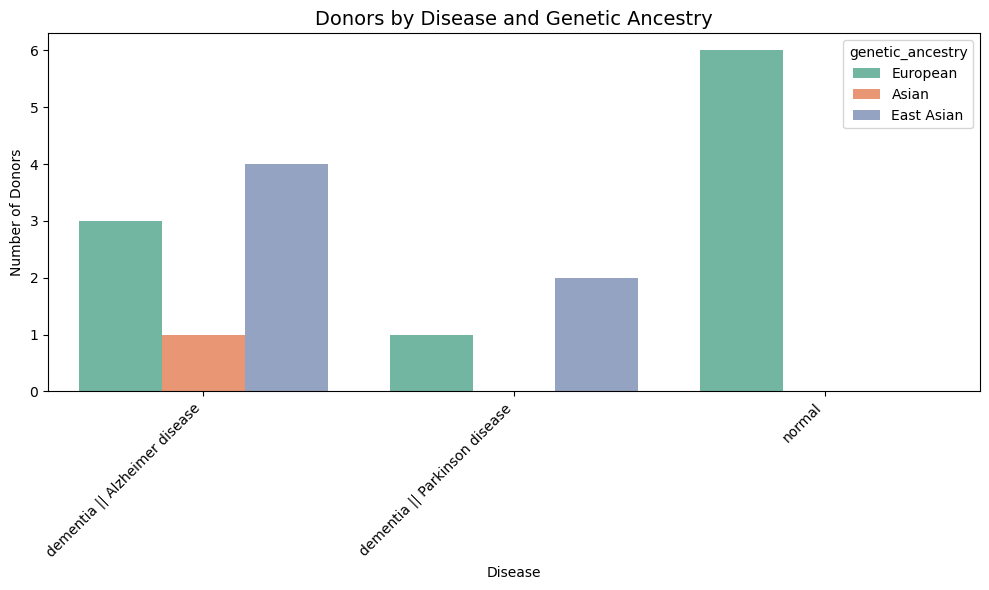

In [57]:
# Convert the series into a dataframe
df_eth_sub = donors_by_disease_and_ethnicity.reset_index(name="n_donors")

# Barplot representation of gender distribution by disease in the reduced dataset
plot_bar(
    df_eth_sub,
    hue="genetic_ancestry",
    title="Donors by Disease and Genetic Ancestry"
)

In [ ]:
# Age distribution by disease in the reduced dataset
donors_by_disease_and_age = (adata_sub.obs.groupby(["disease", "development_stage"], observed=True)["donor_id"].nunique())

donors_by_disease_and_age

disease                        development_stage         
dementia || Alzheimer disease  69-year-old stage             1
                               80 year-old and over stage    2
                               82-year-old stage             1
                               84-year-old stage             1
                               86-year-old stage             1
                               87-year-old stage             1
                               89-year-old stage             1
dementia || Parkinson disease  65-year-old stage             1
                               80 year-old and over stage    1
                               87-year-old stage             1
normal                         77-year-old stage             1
                               79-year-old stage             1
                               80 year-old and over stage    3
                               86-year-old stage             1
Name: donor_id, dtype: int64

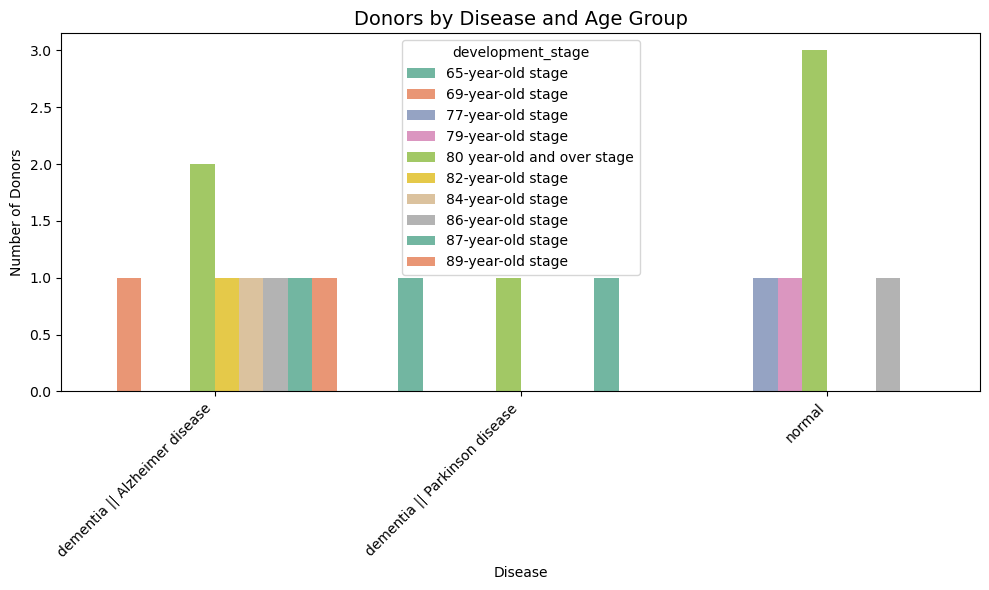

In [56]:
# Convert the series into a dataframe
df_age_sub = donors_by_disease_and_age.reset_index(name = "n_donors")

# Barplot representation of gender distribution by disease in the reduced dataset
plot_bar(
    df_age_sub,
    hue = "development_stage",
    title = "Donors by Disease and Age Group"
    )

## **Saving the Reduced Dataset**

In [41]:
# Input your own path below to save the reduced dataset
#adata_sub.write("*/77k_AD_PD_CTRL.h5ad", compression = "gzip")

# Elodie's path
# adata_sub.write("/Users/elodiehusson/Desktop/AD & PD/77k_AD_PD_CTRL.h5ad", compression="gzip") 

# Yara's path
adata_sub.write("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/77k_AD_PD_CTRL.h5ad", compression = "gzip") 